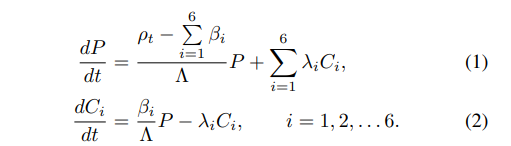

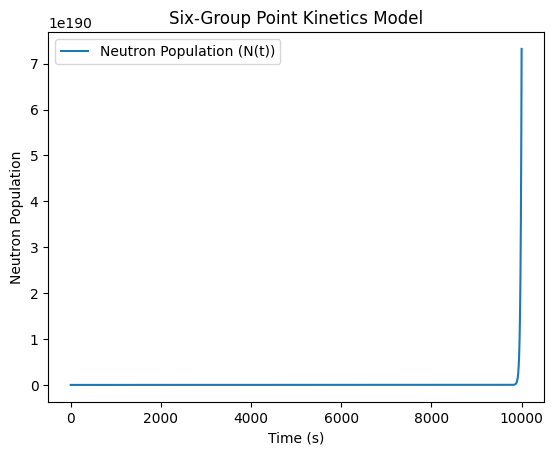

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 参数设定
rho = 0.002  # 反应性
beta = 0.0065  # 总的延迟中子分数
Lambda = 0.0001  # 平均生成时间
beta_i = beta / 6  # 每组的延迟中子分数
lambda_i = np.array([0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01])  # 延迟中子衰变常数

# 初始条件
N0 = 1.0  # 初始中子数
C0 = np.zeros(6)  # 初始延迟中子浓度

# 定义模型方程
def reactor_model(y, t, rho, beta, Lambda, beta_i, lambda_i):
    N = y[0]
    C = y[1:]
    dN_dt = ((rho - beta) / Lambda) * N + np.sum(lambda_i * C)
    dC_dt = beta_i / Lambda * N - lambda_i * C
    return np.concatenate(([dN_dt], dC_dt))

# 时间轴
t = np.linspace(0, 10000, 100000)  # 1000秒内的时间点

# 求解ODE
initial_conditions = np.concatenate(([N0], C0))
solution = odeint(reactor_model, initial_conditions, t, args=(rho, beta, Lambda, beta_i, lambda_i))

# 绘制结果
plt.plot(t, solution[:, 0], label='Neutron Population (N(t))')
plt.xlabel('Time (s)')
plt.ylabel('Neutron Population')
plt.title('Six-Group Point Kinetics Model')
plt.legend()
plt.show()


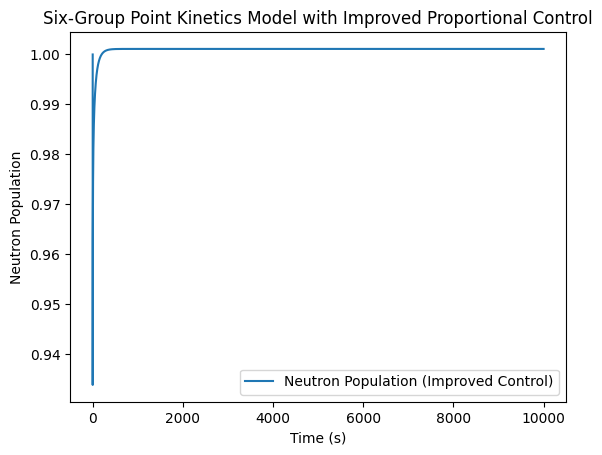

In [8]:
# 增加控制选项
def reactor_model_improved_control(y, t, beta, Lambda, beta_i, lambda_i):
    N = y[0]
    C = y[1:]

    # 更新比例控制常数
    Kp = 0.090  # 提高比例控制常数以增强响应

    # 目标中子数
    N_target = 1.0 #其实就是相当于满功率

    # 根据中子数与目标值的偏差调整反应性，并确保反应性始终在合理范围内
    rho_controlled = max(0, min(0.01, 0.0001 + Kp * (N_target - N))) #需要调试

    dN_dt = ((rho_controlled - beta) / Lambda) * N + np.sum(lambda_i * C)
    dC_dt = beta_i / Lambda * N - lambda_i * C
    return np.concatenate(([dN_dt], dC_dt))

# 使用更新的模型方程求解ODE
solution_improved_control = odeint(reactor_model_improved_control, initial_conditions, t, args=(beta, Lambda, beta_i, lambda_i))

# 绘制更新后的结果
plt.plot(t, solution_improved_control[:, 0], label='Neutron Population (Improved Control)')
plt.xlabel('Time (s)')
plt.ylabel('Neutron Population')
plt.title('Six-Group Point Kinetics Model with Improved Proportional Control')
plt.legend()
plt.show()
